In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# The Curious Population Trends in Former Soviet States
### (The role of religion in the nations' fertility rates)

## Abstract

Even though the global population is still increasing, the overall fertility rate of the world is getting lower every year. Almost all states are either below the replacement level or are moving in that direction. However, there are a handful of countries that at first glance do not seem to be following this general pattern. In this article, we will be investigating whether the post-Soviet states have an advantage in returning to and maintaining higher fertility levels and to what extent religion may play a part in that process.

## Introduction

Let us first provide some context. In 1991, a series of events led to the dissolution of the USSR. As a result, thirteen states (fourteen, if one includes Moldova) were able to claim their independance. For the purposes of this paper, we will divide these countries into three groups, based on their geographical location and predominant population, as listed below:

**Baltic**: Estonia, Latvia, Lithuania

**Northeast Europe**: Belarus, Russia, Ukraine

**Caucasian**: Armenia, Azerbaijan, Georgia

**Central Asia**: Kazakhstan, Kyrgyzstan, Tajikistan, Turkmenistan, Uzbekistan

These distinctions will play when looking at the fertility rates of each country. They may also be important later on, when checking how big of a factor religion is in that regard. 

#### Total Fertility Rates
Each state had its own unique fertility rate, although the regions in which they were located would often share similar tendencies *(fig 1-4)*.

In [13]:
def create_tfr_plot(ax, table, coordinates, x_col, y_col, col_cond, id_list, title, color_list, legend_list):
    legend_list.append('TFRr')
    year_values = np.array(table[x_col].unique())
    for i in range(len(id_list)):
        ax[coordinates[0], coordinates[1]].plot(year_values, table.loc[population_tfr_table[col_cond] == id_list[i], y_col].values, color=color_list[i])
    
    ax[coordinates[0], coordinates[1]].plot(year_values, [2.1 for _ in range(len(year_values))], color='black', linestyle='dotted')
    ax[coordinates[0], coordinates[1]].set_title(title)
    ax[coordinates[0], coordinates[1]].set_xlabel('Year')
    ax[coordinates[0], coordinates[1]].set_ylabel('Total Fertility Rate')
    ax[coordinates[0], coordinates[1]].set_yticks(np.arange(1.0, 7.5, 0.5))
    ax[coordinates[0], coordinates[1]].legend(legend_list, loc='upper right')

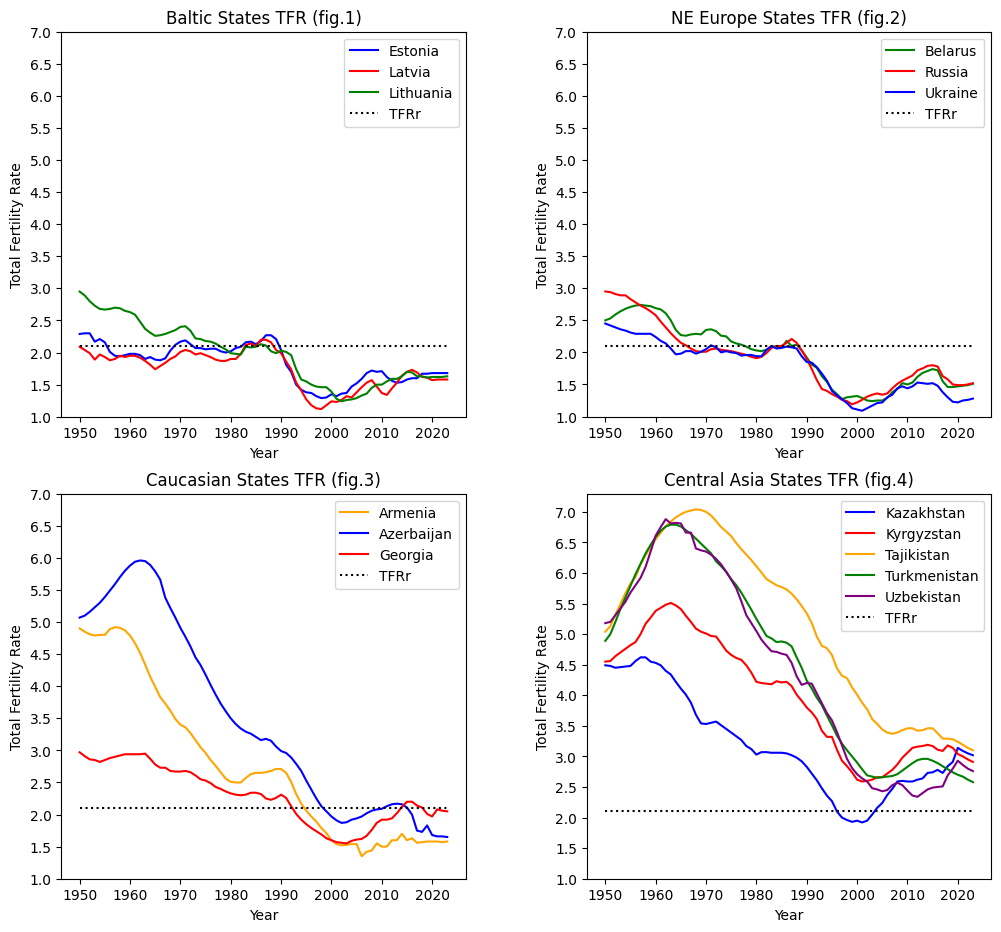

In [92]:
countries_table = pd.read_csv('sql-database/countries_table.csv')
population_tfr_table = pd.read_csv('sql-database/population_tfr_table.csv')

f, ax = plt.subplots(2, 2)
create_tfr_plot(ax, population_tfr_table, [0, 0], 'YearId', 'TFR', 'CountryId', [4, 8, 9], 'Baltic States TFR (fig.1)', 
                ['blue', 'red', 'green',], ['Estonia', 'Latvia', 'Lithuania'])
create_tfr_plot(ax, population_tfr_table, [0, 1], 'YearId', 'TFR', 'CountryId', [3, 10, 13], 'NE Europe States TFR (fig.2)', 
                ['green', 'red', 'blue'], ['Belarus', 'Russia', 'Ukraine'])
create_tfr_plot(ax, population_tfr_table, [1, 0], 'YearId', 'TFR', 'CountryId', [1, 2, 5], 'Caucasian States TFR (fig.3)', 
                ['orange', 'blue', 'red'], ['Armenia', 'Azerbaijan', 'Georgia'])
create_tfr_plot(ax, population_tfr_table, [1, 1], 'YearId', 'TFR', 'CountryId', [6, 7, 11, 12, 14], 'Central Asia States TFR (fig.4)', 
                ['blue', 'red', 'orange', 'green', 'purple'], ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan'])

f.subplots_adjust(wspace=0.3, hspace=0.2)
f.set_figwidth(12)
f.set_figheight(11)
plt.show()


Northeast Europe and Baltic states seemed to experience a local maximum a few years before the end of the Soviet Union somewhere around the replacement level of 2.1 children per woman. After that, their TFR (total fertility rate) feel drastically during the 1990's and have since been fluctuating between 1.2 and 1.7. This is a pattern found often across other European countries.

In the Caucasian region, while the birth rates had been falling significantly overall since the 1960's, there was also a steep decrease between 1991 and the early 2000's. Since then, Armenia has remained varying around 1.5 children per woman, but Azerbaijan and Georgia were able to rise back above the replacement level. Only Georgia however has managed to stabilize somewhat around that number, while Azerbaijan suddenly experienced a steep decline around 2016 and has since fallen to similar levels as Armenia.

The Central Asia region is arguably the most unique out of the four. At first, its states followed a similar trend as those in the Caucases - most of them experiencing peaks in the TFR sometime in 1960's and then starting to decline, all before experiencing a steep decrease around the time of the USSR's dissolution. Kazakhstan was the first to recover on paper and has since returned its TFR to levels unseen since the 1980's, going from 1.92 in 2001 to 3.14 in 2020. Uzbekistan, although having experienced a second local minimum of 2.34 in 2012 returned to 2.93 in 2020. Kyrgyzstan reached a TFR of 3.19 in 2014 and 3.18 in 2018, after falling to its lowest on record of 2.59 in 2001. Despite this, each of these three states has had a declining TFR for the last four years. 

#### Local Minimum/Maximum Disparity

To garner a better understanding of the TFR graphs, we will first need to measure the most significant changes for each country. We can notice that after 1991, every nation experiences a decrease in fertility rates, resulting in a local minimim, followed by an increase to a local maximum. To make our measurement, we will take each of these highest and lowest points and calculate the difference between them, as well as the time it took for the country to create the difference. Judging by the graphs, no country had a local minimum after 2013 or a local maximum before 2007, so those will be our "border point", when looking for these low and high points.

In [97]:
tfr_disparities = []
disparity_periods = []
min_border_interval = 64
max_border_interval = 58
countries = countries_table['Name'].tolist()

In [98]:
for i in range(0, 14):
    start_point = i * 74
    end_point = start_point + 74
    min_border_point = start_point + min_border_interval
    max_border_point = start_point + max_border_interval
    loc_minimum = population_tfr_table['TFR'][start_point:min_border_point].min()
    loc_min_year = population_tfr_table['TFR'][start_point:min_border_point].idxmin()
    loc_maximum = population_tfr_table['TFR'][max_border_point:end_point].max()
    loc_max_year = population_tfr_table['TFR'][max_border_point:end_point].idxmax()
    disparity_tfr = loc_maximum - loc_minimum
    disparity_period = loc_max_year - loc_min_year
    tfr_disparities.append(round(disparity_tfr, 2))
    disparity_periods.append(disparity_period)

disparity_table = pd.DataFrame()
disparity_table['country'] = countries
disparity_table['tfr_disparity'] = tfr_disparities
disparity_table['period'] = disparity_periods
disparity_table

,country,tfr_disparity,period
0,Armenia,0.35,8
1,Azerbaijan,0.30,11
2,Belarus,0.50,12
3,Estonia,0.43,10
4,Georgia,0.65,12
5,Kazakhstan,1.22,19
6,Kyrgyzstan,0.60,13
7,Latvia,0.61,18
8,Lithuania,0.46,13
9,Russia,0.61,16


To get a better feel for how these countries compare to one another, let's visualize them in a scatter plot.

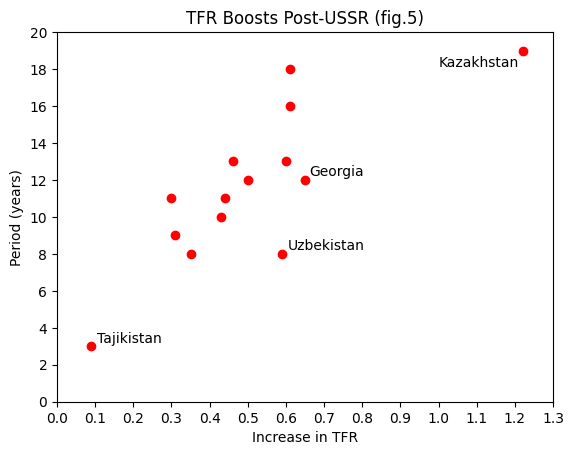

In [99]:
plt.scatter(disparity_table.tfr_disparity, disparity_table.period, color='r')
plt.title('TFR Boosts Post-USSR (fig.5)')
plt.xlabel('Increase in TFR')
plt.ylabel('Period (years)')
plt.xticks(np.arange(0.0, 1.4, 0.1))
plt.yticks(np.arange(0, 22, 2))
plt.annotate('Tajikistan', xy=(0.105, 3.2))
plt.annotate('Georgia', xy=(0.66, 12.25))
plt.annotate('Kazakhstan', xy=(1, 18.1))
plt.annotate('Uzbekistan', xy=(0.605, 8.22))
plt.show()

We can see from the different boosts in TFR after the collapse of the Soviet Union *(fig.5)* that Kazakhstan is by far the most impressive with a disparity of 1.22. Georgia and Uzbekistan are also noticable, as the first achieves the second biggest disparity in much less time, while the latter experiended one of the fastest increases and still made it to the top half of the list. Most other nations either experienced slower or smaller increases in fertility rates. Tajikistan is by both metrics the least impressive, as its growth period was only three years and the TFR increase was by less than 0.1. However, it should be noted that Tajikistan currently still has the highest fertility rate of all these states, making its lack of major improvement somewhat less significant. 

All this data so far demonstrates is simply that a collection of countries that were once a part of the Soviet Union (most of which are in Central Asia) have been able to secure fertility rates above or around the replacement level after drastic falls, following their independence. The question is, given the context of the rest of the world, was? For the rest of this article, we will pay close attention to Georgia, Kazakhstan, Kyrgyzstan and Uzbekistan, since they have demonstrated the most significant changes.

Before we form any hypotheses though, we will take a general look at what these states experienced following their independence.

### Kazakhstan - the Main Outlier

Kazakhstan appears to be by far the most eccentric case for a country. There is no example (based on U.N. data since 1950) of a country falling below the replacement level and then returning so far above that number and staying there. Others have noticed this unique trend of the country's. In his 2023 article "Sustained and Universal Fertility Recuperation in Kazakhstan", Maxim Kan outlines how the local population has gotten to where it is in that regard. He focuses on the role of the economy and education in the demographic changes. His research shows that in addition to there being a correlation between economic growth and fertility rate increases, there were no changes in the progression to parenthood and births that followed among women, regardless of their education. While the fertility rate data he uses differs slightly to that of the United Nations' (he suggests that the local minimum TFR for the county was 1.80 in 1999), it becomes clear that rising prosperity in Kazakhstan had, if anything, a positive affect on birth rates, something which is not typically the case, as can be observed in practically all developed nations.

One suggestion was posed at the end of Kan's paper, which said that further research into the role of religion in the country's TFR increase could be undertaken. This would make sense, as states with higher levels of religiosity often have higher fertiltiy rates.

### Economy of Post-Soviet Countries

For a bit of background, the former soviet nations have overall seen growths in their economies since the start of the new millenium. There were certain crises such as those occurring around 2008, 2014 and 2020 took their toll to different extents. GDP per capita went up in all states, although many of them peaked at some point in the early-mid 2010's and have not recovered fully since, as we can see from the image below *(img. 1)*. 

##### GDP Per Capita in Post Soviet States *(img. 1)*

<img src="GDP Per Capita Post Soviet States.jpg" width="500" height="340">

Interestingly enough, Georgia is the country to experience the most consistent growth in GDP per capita throughout that decade, while Azerbaijan saw the biggest drop out of all of them. This correlates with what we see in the fertility rates of this time period *(fig.3)*. Nevertheless, a fall in GDP per capita does not guarantee a fall in TFR. Kazakhstan too saw a decline in that regard, but its fertility rates continued growing until the end of the decade. Also, Uzbekistan's saw very little growth in its GDP per capita in the 2010's and yet its TFR rose for most of this period.

### Georgia vs. Uzbekistan vs. Kazakhstan 
#### Prosperity (Education & Economy)

#### Religiosity


## Hypthoses

Based on all of these findings we will draw up two different hypotheses:
 * Countries with higher total fertility rates will have higher levels of religiosity
 * Kazakhstan will have had the biggest increase in religiosity out of all former Soviet nations
 * Georgia will be the most religious state outside of Central Asia

## Calculations

### Data on Religiosity

### Determining levels of Religiosity